# PROJECT 3 - PROBLEM 1

In [ ]:
# Author: Dani Gunawan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
# Define maze
maze = \
    np.array([[0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
              [0, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
              [0, 214, 215, 216, 217,   0, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 0],
              [0, 197, 198, 199, 200,   0, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 0],
              [0, 193, 194,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195, 196, 0],
              [0, 176, 177,   0, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 0],
              [0, 162, 163,   0, 164, 165,   0, 166, 167,   0, 168, 169, 170, 171, 172,   0, 173, 174, 175, 0],
              [0, 151, 152,   0, 153, 154,   0, 155, 156,   0, 157, 158,   0,   0,   0,   0, 159, 160, 161, 0],
              [0, 136, 137, 138, 139, 140,   0, 141, 142,   0, 143, 144, 145, 146, 147,   0, 148, 149, 150, 0],
              [0, 121, 122, 123, 124, 125,   0, 126, 127,   0, 128, 129, 130, 131, 132,   0, 133, 134, 135, 0],
              [0,   0,   0,   0,   0, 111,   0, 112, 113,   0,   0, 114, 115, 116, 117,   0, 118, 119, 120, 0],
              [0,  99, 100, 101, 102, 103,   0, 104, 105, 106,   0, 107, 108,   0, 109,   0,   0,   0, 110, 0],
              [0,  89,  90,   0,   0,   0,   0,   0,  91,  92,   0,  93,  94,   0,  95,  96,  97,   0,  98, 0],
              [0,  75,  76,  77,  78,  79,  80,   0,  81,  82,   0,  83,  84,   0,  85,  86,  87,   0,  88, 0],
              [0,  60,  61,  62,  63,  64,  65,   0,  66,  67,   0,  68,  69,   0,  70,  71,  72,  73,  74, 0],
              [0,  47,  48,  49,  50,  51,  52,   0,  53,  54,  55,  56,  57,   0,   0,   0,   0,  58,  59, 0],
              [0,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, 0],
              [0,   0,   0,  19,  20,  21,  22,   0,   0,   0,   0,   0,   0,  23,  24,  25,  26,  27,  28, 0],
              [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
              [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]])

In [ ]:
# initialization bump, oil, wall, and goal
bump = [241, 242, 214, 215, 216, 176, 183, 191, 174, 152, 157, 158, 160,
        149, 93, 94, 60, 61, 58, 59, 35]
oil = [220, 228, 194, 180, 120, 55, 38, 24, 27, 7]
wall = [0]
goal = [208]
start = [50]
max = 248 # 248 states include goal
# parameters will be assigned when calling the function
#p = 0.02
#g = 0.95
#t = 0.01

actions_idx = [0, 1, 2, 3] # action indices
actions = ['U', 'D', 'R', 'L'] # actions: Up, Down, Right, Left

In [ ]:
# This function will return the status of a state
# val = state
# return status: {wall, empty, oil, bump, goal, ERROR}
def get_cell_status(val):
  if val in wall:
    return 'wall'
  elif val in oil:
    return 'oil'
  elif val in bump:
    return 'bump'
  elif val in goal:
    return 'goal'
  else:
    if val < 0 or val > max:
      print("State error")
      return 'ERROR'
    else:
      return 'empty'

In [ ]:
# This function will return the coordinates of a state (s) from a matrix (m)
# return [row, column]
def get_coordinate(m, s):
  c = np.where(m == s)
  return [c[0][0], c[1][0]]

In [ ]:
# This function will return the next state (s prime) based on current state (s) 
# and action
# m = maze
# s = current state
# action = U/D/R/L
# return s prime and status
def get_sprime(m, s, action):
  # find state coordinate
  c = get_coordinate(m, s)
  status = ''
  s_p = ''
  if action.upper() == 'L':
    #substract col by 1 [0, 1]
    tmp_col = np.subtract(c, [0, 1])
  elif action.upper() == 'R':
    # add column by 1 [0, 1]
    tmp_col = np.add(c, [0, 1])
  elif action.upper() == 'D':
    # add row by 1 [1, 0]
    tmp_col = np.add(c, [1, 0])
  elif action.upper() == 'U':
    # subtract row by 1 [1, 0]
    tmp_col = np.subtract(c, [1, 0])
  
  tmp_s_p = m[tmp_col[0]][tmp_col[1]] # s prime (tmp)
  # check cell status
  status = get_cell_status(tmp_s_p)
  if status == 'wall':
    # cannot go to the wall, back to previous state
    s_p = s
  else:
    # empty, oil, and bump
    s_p = tmp_s_p
  
  return [s_p, status]

In [ ]:
# This function will return reward in a state (s_prime)
# s_prime = state
# return s_prime and reward
def get_reward(s_prime):
  result = []

  status = get_cell_status(s_prime) 
  reward = -1 # default reward for taking action
  if status == 'bump':
    reward += -10
  elif status == 'oil':
    reward += -5
  elif status == 'goal':
    reward += 200
  
  result.append(s_prime)
  result.append(reward)
    
  return result  

In [ ]:
# generate state-action matrix
# for example, q matrix, h matrix, pi matrix
# 248 x 4 
# col 0: U, col 1: D, col 2: R, col 3: L
def generate_state_action_matrix(actions):

  sa_matrix = np.zeros((max, len(actions)))

  return sa_matrix


In [ ]:
# function to get next action
# s is current state
# q_matrix is Q matrix
# e is epsilon
def get_action(s, q_matrix, e):
  # note: since Q matrix was saved in index, then s=1 is associated with index 0
  # therefore, we should subtract s with 1 (s-1) 
  idx = s-1
  act_idx = 0
  r = np.random.uniform(0, 1)

  rnd = True

  # check if this is first state visit
  # if yes, then choose action randomly with equal probability
  # if no, then choose action by selecting argmax (1-e)/random (e)
  if np.sum(q_matrix[idx])==0:
    # first visit: sum of all Q(U, D, R, L) = 0
    rnd = True
  else:
    # use argmax/random?
    if r <= e:
      #print("random")
      rnd = True
      # generate new random
      r = np.random.uniform(0, 1)
      #print(r)
    else:
      #print("argmax")
      rnd = False

  # get action
  if rnd:
    # random
    if r <= 0.25:
      act_idx = 0
    elif r <= 0.5:
      act_idx = 1
    elif r <= 0.75:
      act_idx = 2
    elif r <= 1:
      act_idx = 3
  else:
    # argmax
    act_idx = np.argmax(q_matrix[idx])

  return act_idx, actions[act_idx]

In [ ]:
def get_action_taken(act_idx, p):
  # action picked (act_idx) might be different with action taken because of stochasticity
  # note:
  # - reward comes from taken action
  # - next state based on taken action
  stc = np.random.uniform(0, 1)
  # set probability foreach action
  act_prob = []
  for a in actions_idx:
    if a == act_idx:
      act_prob.append(1-p)
    else:
      act_prob.append(p/3)

  act_prob = np.cumsum(act_prob)

  tmp_idx = 0
  for pb in act_prob:
    if stc<=pb:
      break #stop
    else:
      tmp_idx += 1

  # new state index
  act_idx = tmp_idx 

  return act_idx

In [ ]:
def calc_pi(h):
  pi = []

  sge = 0
  for i in range(len(h)):
    sge += np.exp(h[i])

  for act_idx in actions_idx:
    e = np.exp(h[act_idx])
    # softmax function
    pi.append(e/sge)
  
  return pi

In [ ]:
# function to get next action for actor-critic
# s is current state
# pi_matrix is matrix probability action state
# h_matrix is preference (policy parameters)
def get_action_ac(s, pi_matrix, h_matrix):
  # note: s=1 is associated with index 0
  # therefore, we should subtract s with 1 (s-1) 
  idx = s-1

  # update pi
  pi_matrix[idx] = calc_pi(h_matrix[idx])

  # generate random number
  r = np.random.uniform(0, 1)

  prob = np.cumsum(pi_matrix[idx])

  # select action index
  act_idx = 0 
  for pb in prob:
    if r<=pb:
      break #stop
    else:
      act_idx += 1

  return act_idx, actions[act_idx], pi_matrix

In [ ]:
def calc_avg_reward(reward):

  r_tmp = 0
  r_avg_tmp = 0
  reward_avg = []

  iter = 1
  for r in reward:
    r_tmp += r
    r_avg_tmp = r_tmp/iter
    reward_avg.append(r_avg_tmp)
    iter += 1

  return reward_avg

In [ ]:
def calc_avg_reward2(reward):
  
  acc_reward = np.cumsum(reward)
  #print(acc_reward)
  acc_avg_reward = []
  for i in range(len(acc_reward)):
    acc_avg_reward.append(acc_reward[i]/(i+1))
  
  #print(acc_avg_reward)
  return acc_avg_reward

In [ ]:
def plot_data(r_avg, title):

  plt.plot(r_avg, label='Average Accumulated Reward')

  plt.rcParams["figure.figsize"] = (15,8)
  plt.ylabel('Average Accumulated Reward')
  plt.xlabel('Episodes')
  plt.title(title)
  plt.grid(color='0.8', linestyle='-', linewidth=1)
  plt.legend()

  # show plot
  plt.show()

### Maze Visualization

In [ ]:
# Modified from provided codes
# Function to always color the oil, bump, wall, start, and goal blocks.
# States are in the form of a list of (i,j) coordinates on the state matrix
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state, wall_states):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='maroon', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='firebrick', lw=0.25))
        
    # Adding grey wall blocks
    for i in range(len(wall_states)):
        heatmap.add_patch(Rectangle((wall_states[i][1], wall_states[i][0]), 1, 1,
                                    fill=True, facecolor='darkgray', edgecolor='dimgray', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='cornflowerblue', edgecolor='royalblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='limegreen', edgecolor='green', lw=0.25))

In [ ]:
# This function will generate coordinate and action to form a path
# return path
def get_path(pi):
  path = []
  for s in range(1, max+1):
    #print('state: ' + str(s))
    c = get_coordinate(maze, s)
    act = pi[s-1]
    path.append([c, act])

  return path

In [ ]:
# This function will generate the block coordinates for oils, bumps, walls, start, and goal
# return oil, bump, wall, start, and goal coordinates
def get_blocks_coordinates():
  # get oil coordinates
  oil_c = []
  for o in oil:
    c = get_coordinate(maze, o)
    oil_c.append(c)

  # get bump coordinates
  bump_c = []
  for b in bump:
    c = get_coordinate(maze, b)
    bump_c.append(c)

  # get wall coordinates
  wc = np.where(maze == 0)
  wall_c = []
  for i in range(len(wc[0])):
    wall_c.append([wc[0][i], wc[1][i]])

  # get start coordinates
  for s in start:
    start_c = get_coordinate(maze, s)

  # get goal coordinates
  for g in goal:
    goal_c = get_coordinate(maze, g)

  return oil_c, bump_c, wall_c, start_c, goal_c

In [ ]:
# This function will draw arrow in maze based on given path
def draw_maze_arrow(maze, path):

  oil_c, bump_c, wall_c, start_c, goal_c = get_blocks_coordinates()

  # Define heatmap first
  plt.subplots(figsize=(13, 8))
  heatmap = sns.heatmap(maze, fmt=".2f", linewidths=0.25, linecolor='black', cbar=False, cmap='Blues')
  heatmap.set_facecolor('black') 

  coloring_blocks(heatmap, oil_states=oil_c, bump_states=bump_c, start_state=start_c, end_state=goal_c, wall_states=wall_c)
      
  # Plot the route from the start state to the end state.
  # This is just an example, you may want to keep pi* coordinates and actions in a different way
  #path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
  #        ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]
  for state_cr, direction in path:
      r = state_cr[0] # x_coordinate
      c = state_cr[1] # y_coordinate

      if direction == 2:
          plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')   # Right
      if direction == 3:
          plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')  # Left
      if direction == 0:
          plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')  # Up
      if direction == 1:
          plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')  # Down

  # Show plot
  plt.show()

In [ ]:
# This function will draw state values inside maze' blocks
def draw_maze_values(maze, vi):
  ### DRAW MAZE: OPTIMAL STATE VALUES
  # plot the value function values on the heat map
  plt.subplots(figsize=(13,8))

  # Create a 2D matrix of zeros with size of 20 x 20 
  vi_matrix = np.zeros((20,20)) 

  for i in range (1, max+1):
    c = get_coordinate(maze, i)
    vi_matrix[c[0], c[1]] = np.ceil(vi[i-1])

  oil_c, bump_c, wall_c, start_c, goal_c = get_blocks_coordinates()

  # Plot the new heatmap of the new value function values with the original state and coloring blocks
  heatmap = sns.heatmap(maze, fmt=".0f", annot=vi_matrix, linewidths=0.25, linecolor='black',
                        cbar=False, cmap= 'Blues')

  heatmap.set_facecolor('black') # Color for the NA cells in the state matrix
  coloring_blocks(heatmap, oil_states=oil_c, bump_states=bump_c, start_state=start_c, end_state=goal_c, wall_states=wall_c)

  plt.show()

In [ ]:
# This function will draw optimal policy path from starting state
def draw_maze_path(maze, pi):
  states = []
  states.append(start[0])
  c = get_coordinate(maze, start[0])
  act = pi[start[0]-1]
  path = []
  path.append([c, act])

  i = 0
  while (True):
    s_p, status = get_sprime(maze, states[i], actions[act])
    if status == 'goal':
      print("Steps: " + str(i+1))
      break
    else:
      # save coordinate
      states.append(s_p)
      act = pi[s_p-1]
      c = get_coordinate(maze, s_p)
      path.append([c, act])
      i += 1
    
    if i > 100:
      print("Steps: " + str(i))
      break

  draw_maze_arrow(maze, path)

In [ ]:
# This function will draw optimal policy path from starting state
def is_goal_found(maze, pi):
  
  found = 0

  states = []
  states.append(start[0])
  c = get_coordinate(maze, start[0])
  act = pi[start[0]-1]
  path = []
  path.append([c, act])

  i = 0
  while (True):
    s_p, status = get_sprime(maze, states[i], actions[act])
    if status == 'goal':
      #print("Steps: " + str(i+1))
      found = 1
      break
    else:
      # save coordinate
      states.append(s_p)
      act = pi[s_p-1]
      c = get_coordinate(maze, s_p)
      path.append([c, act])
      i += 1
    
    if i > 100:
      #print("Steps: " + str(i))
      found = 0
      break

  return found

### PROBLEM 1 - 1 (Q-LEARNING)

In [ ]:
# equation: Q(s, a) = Q(s, a) + alpha [reward + gamma . max Q(s', a) - Q(s, a)]
# s = current state
# act_idx: 0:U, 1:D, 2:R, 3:L
# m = maze
def calc_q_ql(m, s, act_idx, q_matrix, alpha, gamma, p):
  # get current q
  # note: since Q matrix was saved in index, then s=1 is associated with index 0
  # therefore, we should subtract s with 1 (s-1) 
  idx = s-1
  # Q(s, a)
  q_sa = q_matrix[idx][act_idx]
  
  # to get s prime, we use action taken by the agent (after stochasticity)
  act_idx = get_action_taken(act_idx, p)

  # get s prime
  s_prime, status = get_sprime(m, s, actions[act_idx])
  # reward
  _, reward = get_reward(s_prime)
  
  # index = s_prime-1
  max_qsa2 = np.max(q_matrix[s_prime-1])

  # update q
  q_sa = q_sa + (alpha * (reward + ((gamma * max_qsa2) - q_sa)))

  return s_prime, q_sa, reward


In [ ]:
# single episode
def q_learning(m, p, g, alpha, eps, s, q_matrix):
  reward = 0
  max_iter = 1000 # max iteration in one episode
  iter = 0
  for i in range (max_iter):
    iter = i+1
    # check if s is goal, then stop iteration
    if (get_cell_status(s)=='goal'):
      # stop loop
      break;

    # state index = s-1
    idx = s-1

    # 1: determine the next action
    act_idx, act = get_action(s, q_matrix, eps)

    # 2: update Q
    s, q_sa, r = calc_q_ql(m, s, act_idx, q_matrix, alpha, g, p)
    q_matrix[idx][act_idx] = q_sa
    reward += r

  # average reward = total reward/number of iteration
  reward = reward/iter

  return q_matrix, reward

In [ ]:
p = 0.02
g = 0.95
alpha = 0.3
eps = 0.1

goal_count = 0
tenrun_avg_reward_ql = [] # store total reward for 10 independent runs

for n in range(10):

  q_m = generate_state_action_matrix(actions) # set all q values = 0

  total_reward_tmp = [] # store total reward for one independent run
  
  # run 1000 episodes
  for i in range(1000):
    # max = 248
    # max should be added by 1 to include 248 in the randint result
    # get random state
    s = np.random.randint(1, max+1)
    while s == goal[0]: # if the state is goal, run randint
      s = np.random.randint(1, max+1)

    # run single episode
    q_m, re = q_learning(maze, p, g, alpha, eps, s, q_m)

    # record reward
    total_reward_tmp.append(re)

  # get path
  path = []
  # optimal policy
  pi = []
  i = 0
  for q in q_m:
    c = get_coordinate(maze, i+1) # s = i+1
    act_idx = np.argmax(q)
    path.append([c, act_idx])
    pi.append(act_idx)
    i += 1 # next index

  goal_count += is_goal_found(maze, pi)

  avg_reward = calc_avg_reward2(total_reward_tmp)
  tenrun_avg_reward_ql.append(avg_reward)


avg_total_reward_ql = np.mean(tenrun_avg_reward_ql, axis=0)

print("Goal reached: {}".format(goal_count))

Goal reached: 10


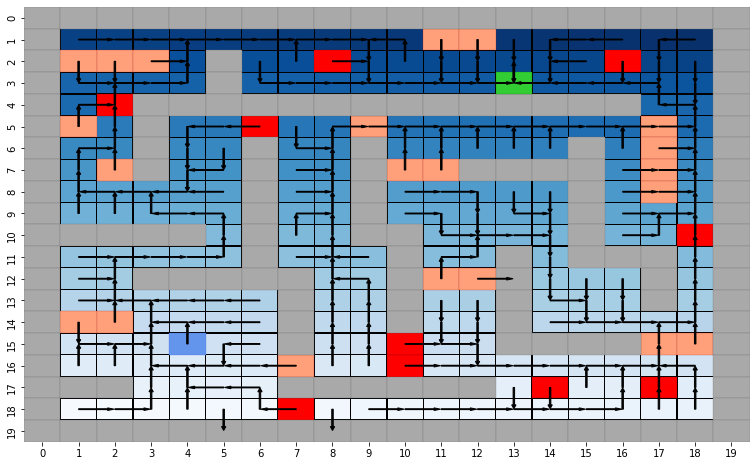

In [ ]:
draw_maze_arrow(maze, path)

Steps: 37


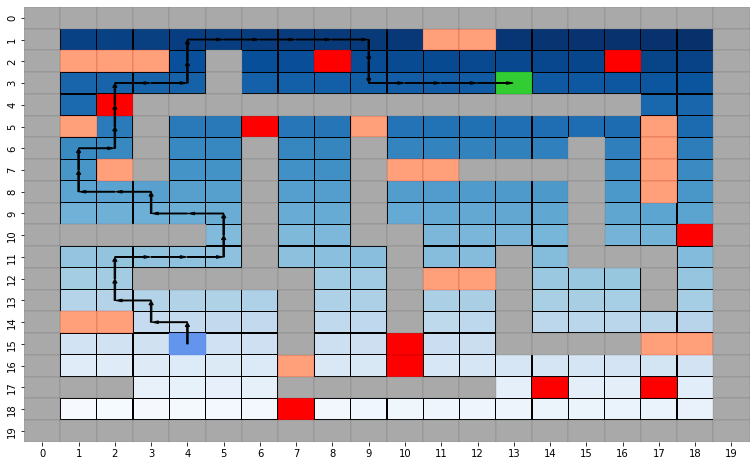

In [ ]:
draw_maze_path(maze, pi)

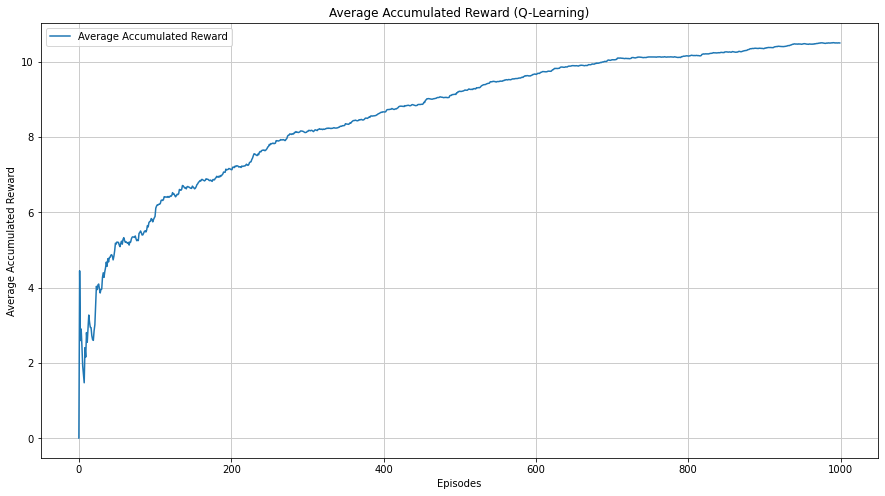

In [ ]:
plot_data(avg_total_reward_ql, "Average Accumulated Reward (Q-Learning)")

### PROBLEM 1 - 2 (SARSA)

In [ ]:
# equation: Q(s, a) = Q(s, a) + alpha [reward + gamma . Q(s', a) - Q(s, a)]
# s = current state
# act_idx: 0:U, 1:D, 2:R, 3:L
# m = maze
def calc_q_sarsa(m, s, act_idx, q_matrix, alpha, gamma, e, p):

  # get current q
  # note: since Q matrix was saved in index, then s=1 is associated with index 0
  # therefore, we should subtract s with 1 (s-1) 
  idx = s-1
  # Q(s, a)
  q_sa = q_matrix[idx][act_idx]
  
  # to get s prime, we use action taken by the agent (after stochasticity)
  act_idx = get_action_taken(act_idx, p)

  # get s prime
  s_prime, status = get_sprime(m, s, actions[act_idx])
  # reward
  _, reward = get_reward(s_prime)

  # get s prime action
  sp_act_idx, sp_act = get_action(s_prime, q_matrix, e)
  
  # qsa2 => q s_prime
  qsa2 = q_matrix[s_prime-1][sp_act_idx]

  # update q
  q_sa = q_sa + (alpha * (reward + ((gamma * qsa2) - q_sa)))

  return s_prime, q_sa, reward


In [ ]:
# single episode
def sarsa(m, p, g, alpha, eps, s, q_matrix):
  reward = 0
  max_iter = 1000 # max iteration in one episode
  iter = 0
  for i in range (max_iter):
    iter = i+1
    # check if s is goal, then stop iteration
    if (get_cell_status(s)=='goal'):
      # stop loop
      break;

    # state index = s-1
    idx = s-1

    # 1: determine the next action
    act_idx, act = get_action(s, q_matrix, eps)

    # 2: update Q
    s, q_sa, r = calc_q_sarsa(m, s, act_idx, q_matrix, alpha, g, eps, p)
    q_matrix[idx][act_idx] = q_sa
    reward += r
  
  # average reward = total reward/number of iteration
  reward = reward/iter

  return q_matrix, reward

In [ ]:
p = 0.02
g = 0.95
alpha = 0.3
eps = 0.1

goal_count = 0
tenrun_avg_reward_sarsa = [] # store total reward for 10 independent runs

for n in range(10):

  q_m_sarsa = generate_state_action_matrix(actions) # set all q values = 0

  total_reward_tmp = [] # store total reward for one independent run

  # run 1000 episodes
  for i in range(1000):
    # max = 248
    # max should be added by 1 to include 248 in the randint result
    # get random state
    s = np.random.randint(1, max+1)
    while s == goal[0]: # if the state is goal, run randint
      s = np.random.randint(1, max+1)

    # run single episode
    q_m_sarsa, re = sarsa(maze, p, g, alpha, eps, s, q_m_sarsa)
    total_reward_tmp.append(re)

  # get path
  path_sarsa = []
  # optimal policy
  pi_sarsa = []
  i = 0
  for q in q_m_sarsa:
    c = get_coordinate(maze, i+1) # s = i+1
    act_idx = np.argmax(q)
    path_sarsa.append([c, act_idx])
    pi_sarsa.append(act_idx)
    i += 1 # next index

  goal_count += is_goal_found(maze, pi_sarsa)

  avg_reward = calc_avg_reward(total_reward_tmp)
  tenrun_avg_reward_sarsa.append(avg_reward)


avg_total_reward_sarsa = np.mean(tenrun_avg_reward_sarsa, axis=0)

print("Goal reached: {}".format(goal_count))

Goal reached: 9


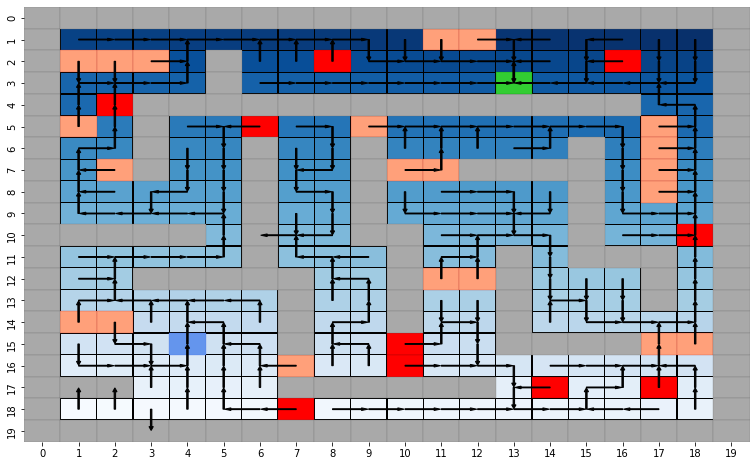

In [ ]:
draw_maze_arrow(maze, path_sarsa)

Steps: 37


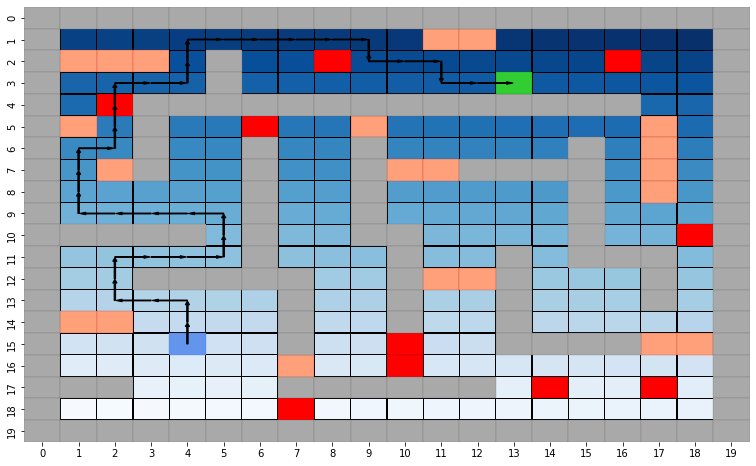

In [ ]:
draw_maze_path(maze, pi_sarsa)

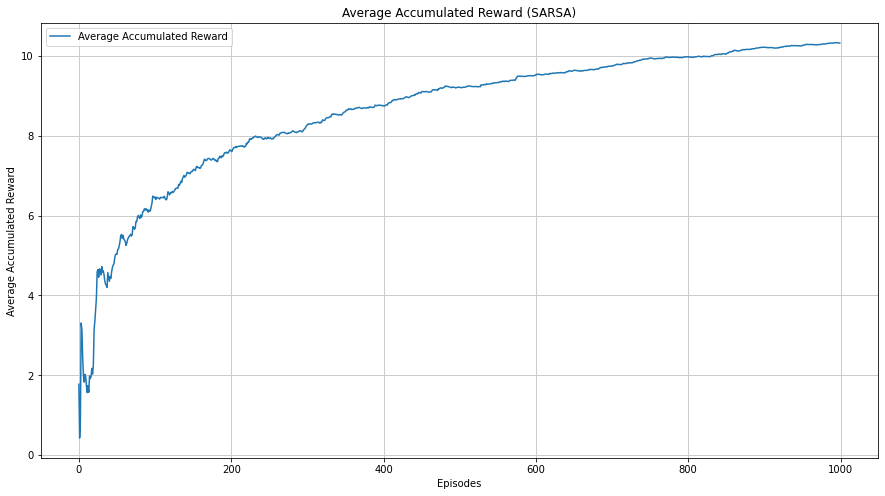

In [ ]:
plot_data(avg_total_reward_sarsa, "Average Accumulated Reward (SARSA)")

### PROBLEM 1 - 3 (ACTOR-CRITIC)

In [ ]:
def calc_h(m, s, v, alpha, gamma, beta, p, pi_matrix, h_matrix):

  ### calc td error
  # get action
  # update pi_matrix with new probability values
  act_idx, act, pi_matrix = get_action_ac(s, pi_matrix, h_matrix)

  # get current h
  # note: since H matrix was saved in index, then s=1 is associated with index 0
  # therefore, we should subtract s with 1 (s-1) 
  idx = s-1
  h_sa = h_matrix[idx][act_idx]
  pi_sa = pi_matrix[idx][act_idx]
  selected_idx = act_idx
  
  # to get s prime, we use action taken by the agent (after stochasticity)  
  act_idx = get_action_taken(act_idx, p)

  # get s prime
  s_prime, status = get_sprime(m, s, actions[act_idx])
  
  # reward
  _, reward = get_reward(s_prime)

  # note: since v was saved in index, then s/s_prime=1 is associated with index 0
  # therefore, we should subtract s/s_prime with 1 (s/s_prime-1) 
  sp_idx = s_prime-1
  delta = reward + (gamma * v[sp_idx]) - v[idx]

  ### update V(s)
  v[idx] = v[idx] + (alpha * delta)

  ### update H(s, a)
  #h_matrix[idx][act_idx] = h_matrix[idx][act_idx] + (beta * delta * (1-pi_matrix[idx][act_idx]))
  h_sa = h_sa + (beta * delta * (1-pi_sa))

  #return s_prime, v, pi_matrix, h_matrix, reward
  return s_prime, v, pi_matrix, h_sa, selected_idx, reward

In [ ]:
# single episode
def actor_critic(m, p, s, v, alpha, gamma, beta, pi_matrix, h_matrix):
  reward = 0
  max_iter = 1000 # max iteration in one episode
  iter = 0
  for i in range(max_iter):
    iter = i+1
    # check if s is goal, then stop iteration
    if (get_cell_status(s)=='goal'):
      # stop loop
      break;
    
    # state index = s-1
    idx = s-1

    s, v, pi_matrix, h_sa, act_idx, r = calc_h(m, s, v, alpha, gamma, beta, p, pi_matrix, h_matrix)
    h_matrix[idx][act_idx] = h_sa
    reward += r
  
  # average reward = total reward/number of iteration
  reward = reward/iter

  return h_matrix, pi_matrix, v, reward

In [ ]:
p = 0.02 #0.02
g = 0.95 #0.95
alpha = 0.3 #0.3
beta = 0.05 #0.05

goal_count = 0
tenrun_avg_reward_ac = [] # store total reward for 10 independent runs

for n in range(10):
  h_m = generate_state_action_matrix(actions) # preference matrix, set all h values = 0
  pi_m = generate_state_action_matrix(actions) # pi matrix
  v = np.zeros((max, 1)) # storing v values
  total_reward_tmp = [] # store total reward for one independent run

  # run 1000 episodes
  for i in range(1000):
    # max = 248
    # max should be added by 1 to include 248 in the randint result
    # get random state
    s = np.random.randint(1, max+1)
    while s == goal[0]: # if the state is goal, run randint
      s = np.random.randint(1, max+1)

    h_m, pi_m, v, re = actor_critic(maze, p, s, v, alpha, g, beta, pi_m, h_m)
    total_reward_tmp.append(re)

  # get path
  path_ac = []
  # optimal policy
  pi_ac = []
  i = 0
  for h in h_m:
    c = get_coordinate(maze, i+1) # s = i+1
    act_idx = np.argmax(h)
    path_ac.append([c, act_idx])
    pi_ac.append(act_idx)
    i += 1 # next index
  
  goal_count += is_goal_found(maze, pi_ac)

  avg_reward = calc_avg_reward(total_reward_tmp)
  tenrun_avg_reward_ac.append(avg_reward)


avg_total_reward_ac = np.mean(tenrun_avg_reward_ac, axis=0)

print("Goal reached: {}".format(goal_count))

Goal reached: 0


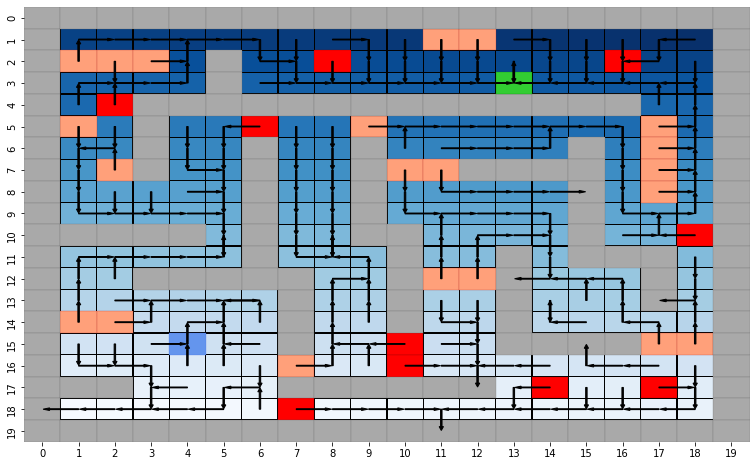

In [ ]:
draw_maze_arrow(maze, path_ac)

Steps: 101


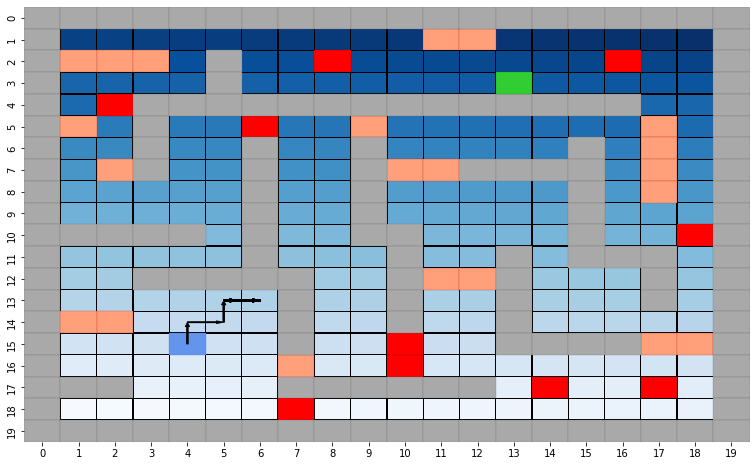

In [ ]:
draw_maze_path(maze, pi_ac)

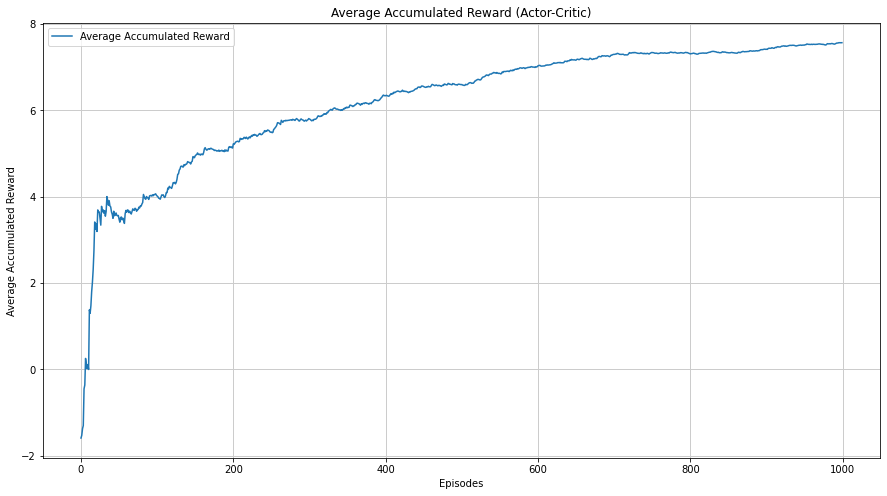

In [ ]:
plot_data(avg_total_reward_ac, "Average Accumulated Reward (Actor-Critic)")

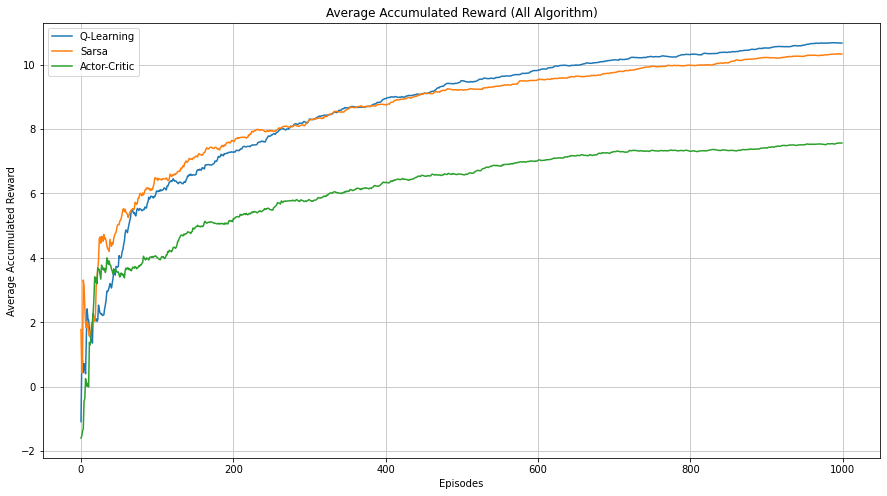

In [ ]:
plt.plot(avg_total_reward_ql, label='Q-Learning')
plt.plot(avg_total_reward_sarsa, label='Sarsa')
plt.plot(avg_total_reward_ac, label='Actor-Critic')

plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Episodes')
plt.title('Average Accumulated Reward (All Algorithm)')
plt.grid(color='0.8', linestyle='-', linewidth=1)
plt.legend()

# show plot
plt.show()


### ABLATION STUDY - ACTOR-CRITIC

In [ ]:
p = 0.02 #0.02
g = 0.95 #0.95
alpha = 0.01 #0.3
beta = 0.001 #0.05

goal_count = 0
tenrun_avg_reward_ac2 = [] # store total reward for 10 independent runs

for n in range(10):
  h_m = generate_state_action_matrix(actions) # preference matrix, set all h values = 0
  pi_m = generate_state_action_matrix(actions) # pi matrix
  v = np.zeros((max, 1)) # storing v values
  total_reward_tmp = [] # store total reward for one independent run

  # run 1000 episodes
  for i in range(1000):
    # max = 248
    # max should be added by 1 to include 248 in the randint result
    # get random state
    s = np.random.randint(1, max+1)
    while s == goal[0]: # if the state is goal, run randint
      s = np.random.randint(1, max+1)

    h_m, pi_m, v, re = actor_critic(maze, p, s, v, alpha, g, beta, pi_m, h_m)
    total_reward_tmp.append(re)

  # get path
  path_ac2 = []
  # optimal policy
  pi_ac2 = []
  i = 0
  for h in h_m:
    c = get_coordinate(maze, i+1) # s = i+1
    act_idx = np.argmax(h)
    path_ac2.append([c, act_idx])
    pi_ac2.append(act_idx)
    i += 1 # next index
  
  goal_count += is_goal_found(maze, pi_ac2)

  avg_reward = calc_avg_reward(total_reward_tmp)
  tenrun_avg_reward_ac2.append(avg_reward)


avg_total_reward_ac2 = np.mean(tenrun_avg_reward_ac2, axis=0)

print("Goal reached: {}".format(goal_count))

Goal reached: 0


In [ ]:
pi_exp1 = pi_ac2
path_exp1 = path_ac2
avg_total_reward_exp1 = avg_total_reward_ac2

In [ ]:
pi_exp2 = pi_ac2
path_exp2 = path_ac2
avg_total_reward_exp2 = avg_total_reward_ac2

In [ ]:
pi_exp3 = pi_ac2
path_exp3 = path_ac2
avg_total_reward_exp3 = avg_total_reward_ac2

#### exp1: alpha = 0.3, beta = 0.001

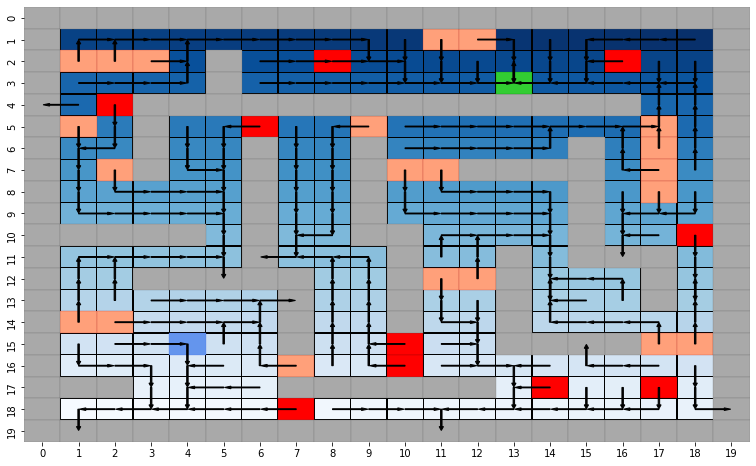

In [ ]:
draw_maze_arrow(maze, path_exp1)

Steps: 101


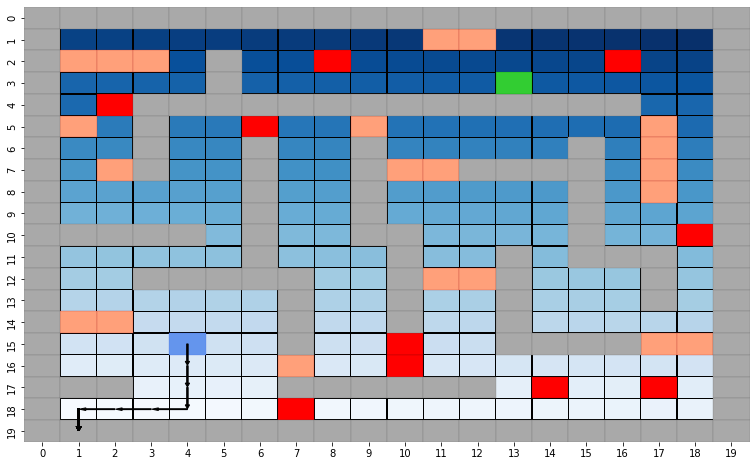

In [ ]:
draw_maze_path(maze, pi_exp1)

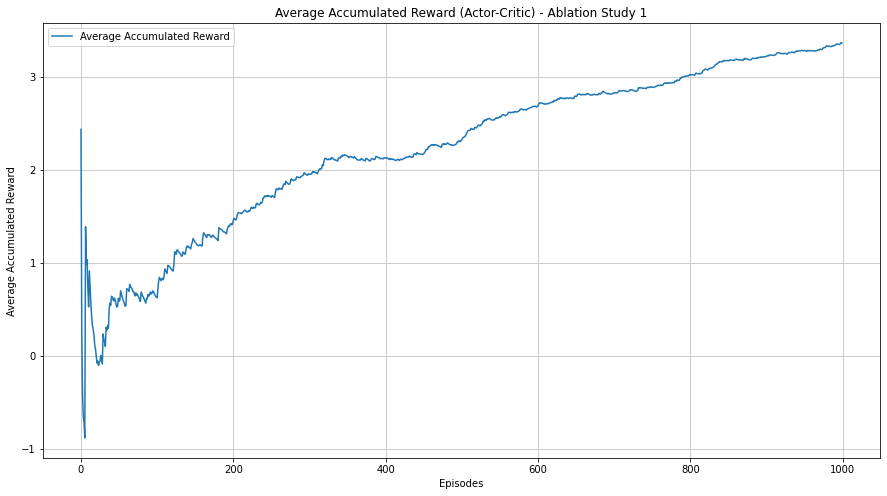

In [ ]:
plot_data(avg_total_reward_exp1, "Average Accumulated Reward (Actor-Critic) - Ablation Study 1")

#### exp2: alpha = 0.01, beta = 0.00001


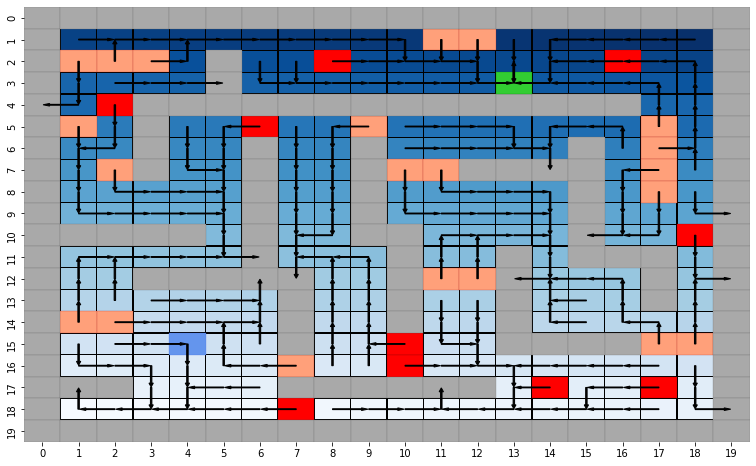

In [ ]:
draw_maze_arrow(maze, path_exp2)

Steps: 101


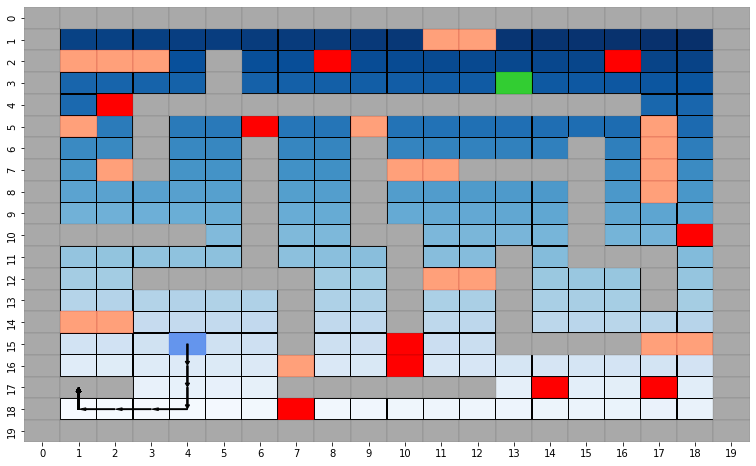

In [ ]:
draw_maze_path(maze, pi_exp2)

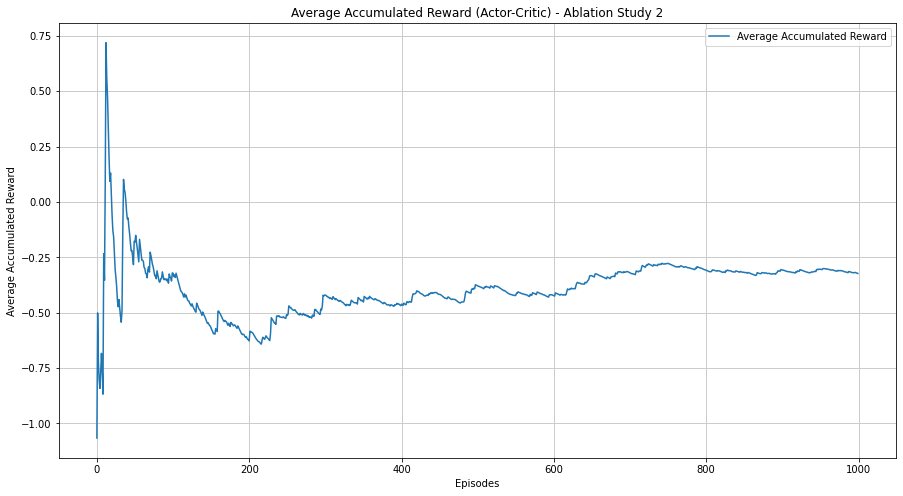

In [ ]:
plot_data(avg_total_reward_exp2, "Average Accumulated Reward (Actor-Critic) - Ablation Study 2")

#### exp3: alpha = 0.01, beta = 0.001

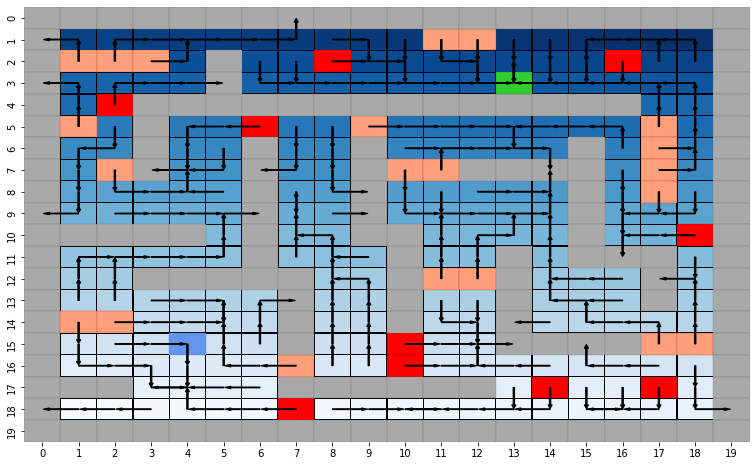

In [ ]:
draw_maze_arrow(maze, path_exp3)

Steps: 101


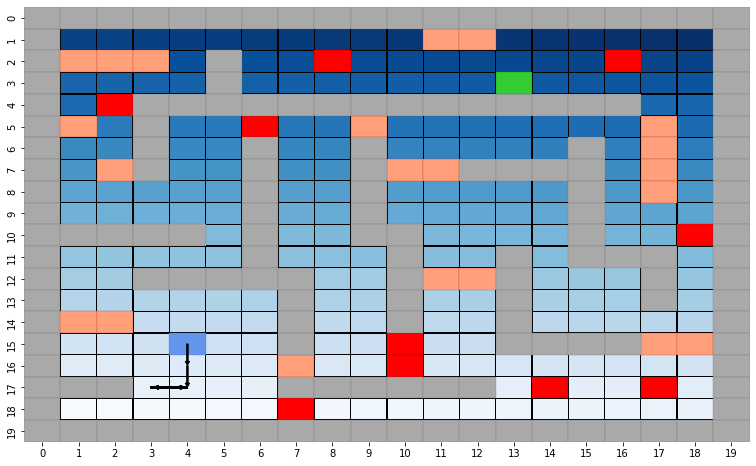

In [ ]:
draw_maze_path(maze, pi_exp3)

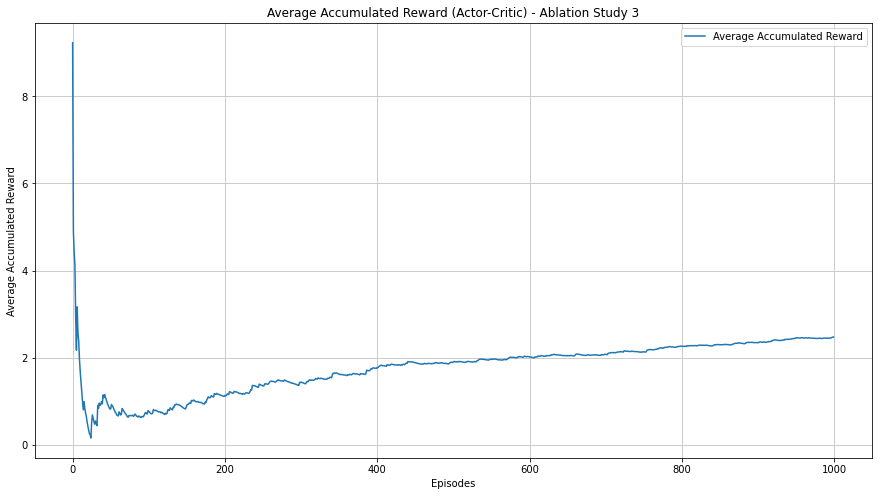

In [ ]:
plot_data(avg_total_reward_exp3, "Average Accumulated Reward (Actor-Critic) - Ablation Study 3")

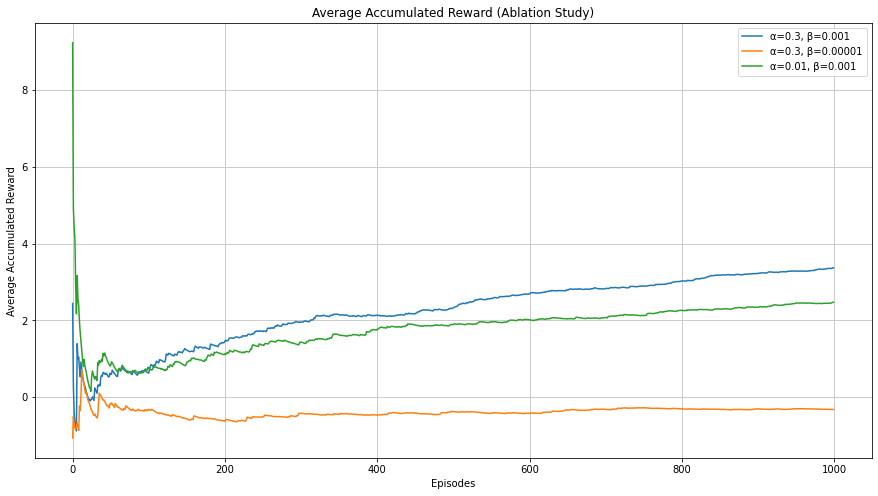

In [ ]:
plt.plot(avg_total_reward_exp1, label='\u03B1=0.3, \u03B2=0.001')
plt.plot(avg_total_reward_exp2, label='\u03B1=0.3, \u03B2=0.00001')
plt.plot(avg_total_reward_exp3, label='\u03B1=0.01, \u03B2=0.001')

plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Episodes')
plt.title('Average Accumulated Reward (Ablation Study)')
plt.grid(color='0.8', linestyle='-', linewidth=1)
plt.legend()

# show plot
plt.show()
